<a href="https://colab.research.google.com/github/LingyiC/World-Happiness-Report-Visualization-and-Prediction/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# delete _pycache_ folder first
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings            
warnings.filterwarnings("ignore") 

#from pandas.tools.plotting import parallel_coordinates

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [0]:
# load data from csv file_Lingyi
# data_2016=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2016.csv')
# data_2017=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2017.csv')
# data_2018=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2018.csv')
# data_2019=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2019.csv')

data_2016=pd.read_csv('/content/gdrive/My Drive/Project code/data/2016.csv')
data_2017=pd.read_csv('/content/gdrive/My Drive/Project code/data/2017.csv')
data_2018=pd.read_csv('/content/gdrive/My Drive/Project code/data/2018.csv')
data_2019=pd.read_csv('/content/gdrive/My Drive/Project code/data/2019.csv')

In [0]:
# unify the header
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]
data_2018.columns=[each.replace("."," ") for each in data_2018.columns]
data_2018.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2018.columns]

## Simple Linear Regression

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [0]:
data_2018.head()

,Country,Region,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual
0,Afghanistan,Southern Asia,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
1,Albania,Central and Eastern Europe,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
2,Algeria,Middle East and Northern Africa,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
3,Angola,Sub-Saharan Africa,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
4,Argentina,Latin America and Caribbean,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005


Take extra effort to choose the right model to avoid Auto-esotericism/Rube-Goldberg’s Disease.

Here are the OLS assumptions:

1. Linearity: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
2. No multicollinearity: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
3. Zero conditional mean: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
4. Homoskedasticity: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
5. No autocorrelation (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

**At first, we analyze Happiness_Score~Economy**

Result: Happiness_Score = 2.2715 * Economy + 3.1141

**Analysis** is following: 

In [0]:
def Economy_regression(data):
  Happiness_Score = data.Happiness_Score
  factor_data = data.Economy
  score_economy_model = ols("Happiness_Score ~ Economy", data=data_2018).fit()
  model_summary = score_economy_model.summary()
  fig = plt.figure(figsize=(12,10))
  fig = sm.graphics.plot_regress_exog(score_economy_model, "Economy", fig=fig)
  print(model_summary)
  
  # confidence interval
  x = data[['Economy']]
  y = data[['Happiness_Score']]
  # Retrieve our confidence interval values
  # _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
  # since wls_prediction_std(housing_model) returns 3 values
  _, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(score_economy_model)

  fig, ax = plt.subplots(figsize=(10,7))

  # plot the dots
  # 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
  ax.plot(x, y, 'o', label="Economy")

  # plot the trend line
  # g-- and r-- specify the color to use
  ax.plot(x, score_economy_model.fittedvalues, 'g--.', label="OLS")

  # plot upper and lower ci values
  ax.plot(x, confidence_interval_upper, 'r--')
  ax.plot(x, confidence_interval_lower, 'r--')

  # plot legend
  ax.legend(loc='best');
  

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     296.4
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           9.01e-37
Time:                        18:13:01   Log-Likelihood:                -141.43
No. Observations:                 146   AIC:                             286.9
Df Residuals:                     144   BIC:                             292.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1141      0.143     21.817      0.0

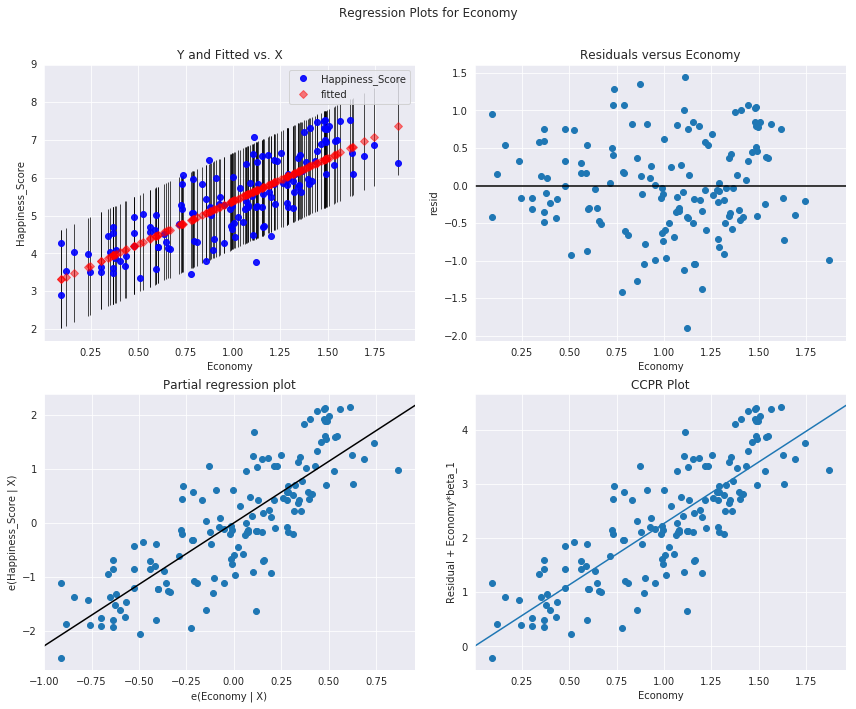

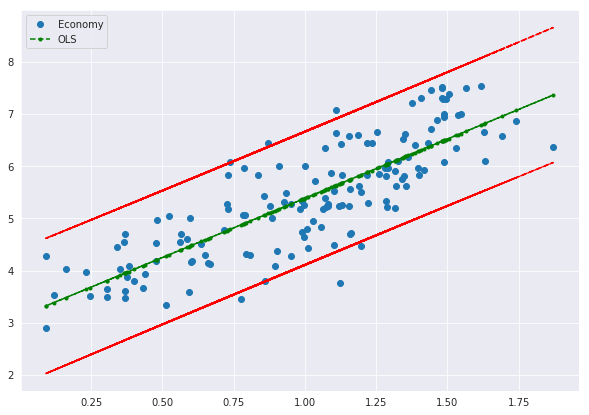

In [0]:
Economy_regression(data_2018)

The four graphs above:
1. The "Y and Fitted vs. X" graph plots the dependent variable against our predicted values with a confidence interval. The relationship in our graph indicates that `Happiness_Score` and `Economy` are positively correlated, i.e., when one variable increases the other decreases.

2. The “Residuals versus Economy” graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds. 

3. The “Partial regression plot” shows the relationship between `Happiness_Score` and `Economy`, taking in to account the impact of adding other independent variables on our existing total_unemployed coefficient. We'll see later how this same graph changes when we add more variables.

4. The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing `Economy` coefficient.  [PARTIAL RESIDUAL PLOT](https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/partresi.htm)

5. The next plot graphs our trend line (green), the observations (dots), and our confidence interval (red).

## Multiple Linear Regression

In [0]:
def Economy_multiple_regression(data):
  Happiness_Score = data.Happiness_Score
  Economy = data.Economy
  Family = data.Family
  Health = data.Health
  Freedom = data.Freedom
  Generosity = data.Generosity
  Trust = data.Trust
  Dystopia_Residual = data.Dystopia_Residual
  happiness_score_model = ols("""Happiness_Score ~ Economy 
                                              + Family 
                                              + Health
                                              + Freedom 
                                              + Generosity
                                              + Trust
                                              + Dystopia_Residual""", data=data_2018).fit()
  # summarize our model
  happiness_score_model_summary = happiness_score_model.summary()
  print(happiness_score_model_summary)
  fig = plt.figure(figsize=(10,12))
  fig = sm.graphics.plot_partregress_grid(happiness_score_model, fig=fig)
  fig = plt.figure(figsize=(10,12))
  fig = sm.graphics.plot_regress_exog(happiness_score_model, "Economy", fig=fig)

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.205e+08
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:39:07   Log-Likelihood:                 989.06
No. Observations:                 146   AIC:                            -1962.
Df Residuals:                     138   BIC:                            -1938.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002      0.00

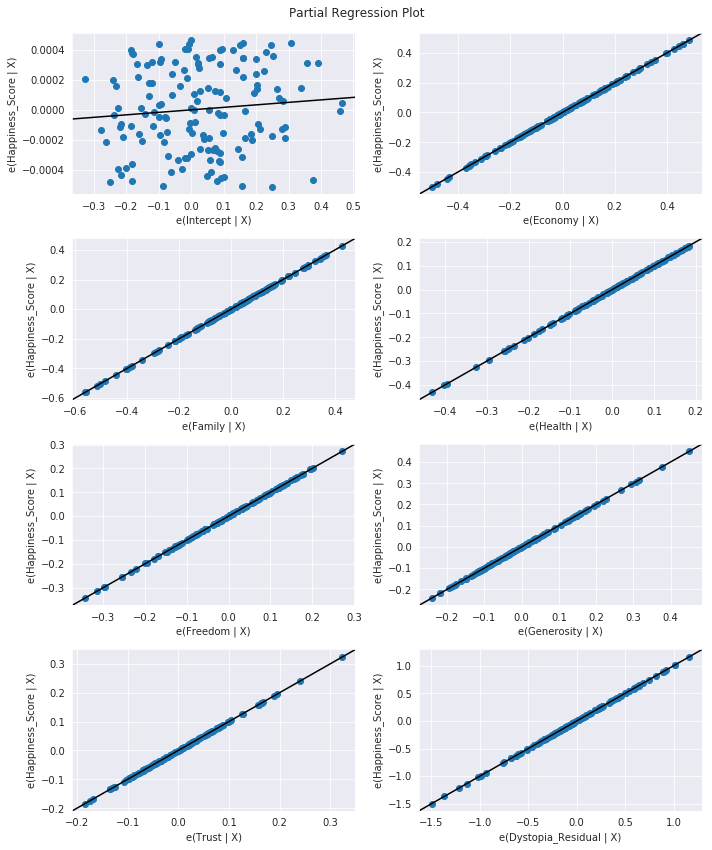

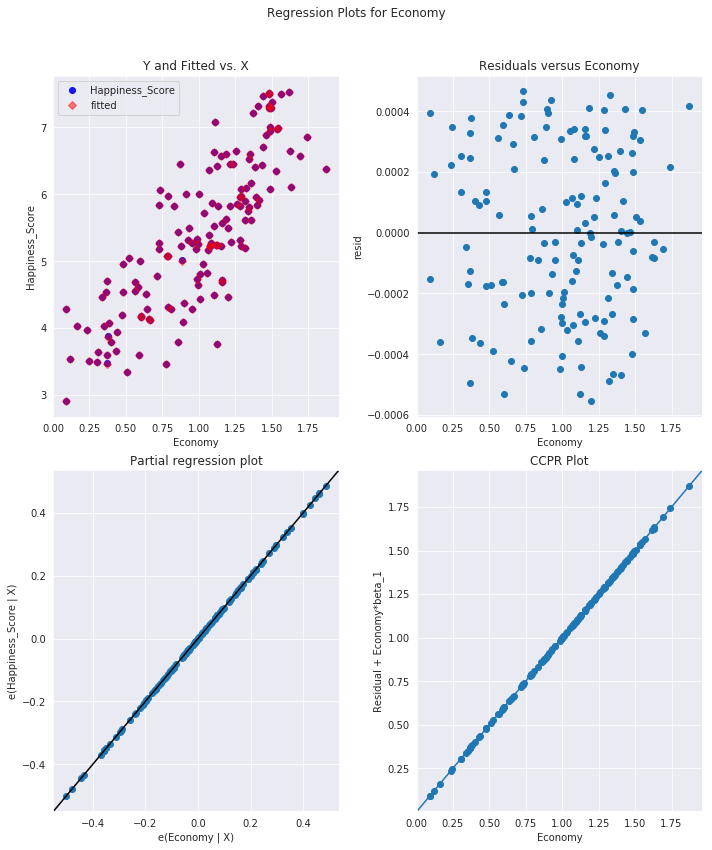

In [0]:
Economy_multiple_regression(data_2018)